# AIM- Forecast the passanger volume for the next 6 months to 1 year

In [1]:
import pandas as pd
import numpy as np


In [2]:
air=pd.read_csv(r'E:\Imarticus\11.TIME-SERIES\AirPassengers.csv')

In [3]:
air.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
air.Month=pd.to_datetime(air.Month,infer_datetime_format=True)

In [6]:
ind_air=air.set_index(['Month'])

In [7]:
ind_air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
ind_air.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [9]:
import matplotlib.pyplot as plt

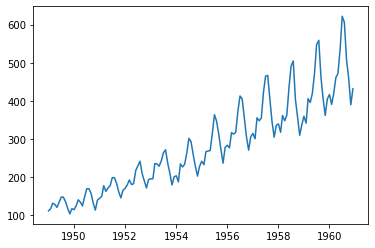

In [10]:
plt.plot(ind_air) 

The Graph is not Stationary.

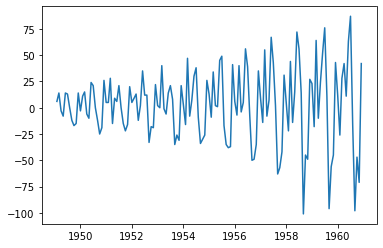

In [11]:
plt.plot(ind_air.diff()) 

The Mean is constant, but Variance is still not constant.

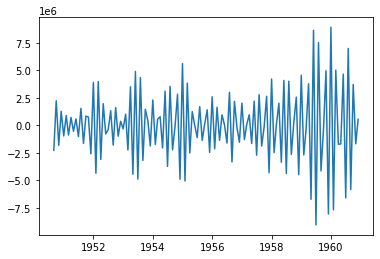

In [12]:
plt.plot(ind_air.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff()) 

#### Even after doing Differencing multiple times, Series was not Stationary.

we will take Log now for smoothning effect.

In [13]:
ind_air_log=np.log(ind_air)

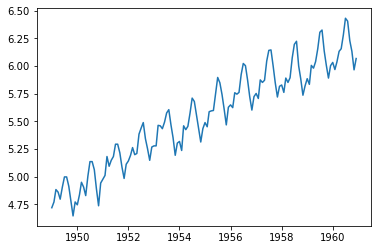

In [14]:
plt.plot(ind_air_log)

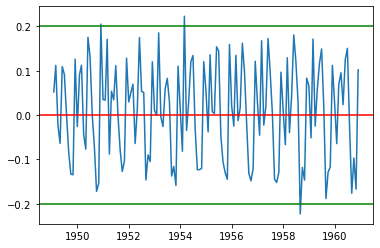

In [15]:
plt.plot(ind_air_log.diff())
plt.axhline(y=0,color='r')
plt.axhline(y=.2,color='g')
plt.axhline(y=-.2,color='g')

Graph is now almost Stationary

#### I(1), because we've done One level of Differencing.
But my Original Series has been changed. now my base series is in Log
Model would be build on log  so prediction also in log. So, at the end we will take anti-Log

#### But whatever values we get from ACF and PACF are not binding(Not compulsary but indication of the values.)

In [21]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

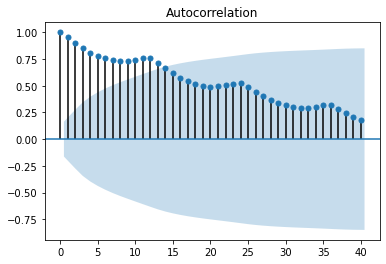

In [23]:
plot_acf(ind_air_log.Passengers,lags=40);

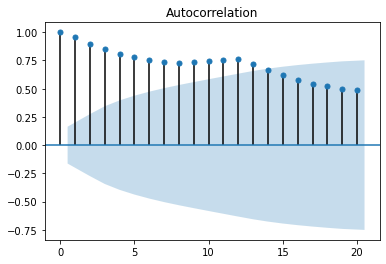

In [24]:
plot_acf(ind_air_log.Passengers,lags=20);

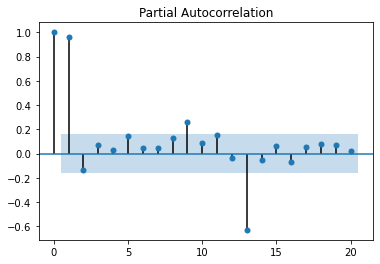

In [25]:
plot_pacf(ind_air_log.Passengers,lags=20);

#### AR[2] & MA[0] | p=2,q=0,d=1

MA[0] because, we didn't got any information from acf graph.

### Lets Build the Model

In [26]:
model=ARIMA(ind_air_log,order=(2,1,0))
result=model.fit();

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [27]:
result.params

const                 0.009600
ar.L1.D.Passengers    0.235864
ar.L2.D.Passengers   -0.172474
dtype: float64

In [28]:
forecasted_values=result.forecast(steps=12) # 1st array is forecasted array.

In [29]:
forecasted_values[0] # Prediction i LOG.

array([6.13038726, 6.13635264, 6.13606414, 6.14395848, 6.15486148,
       6.1650628 , 6.17457969, 6.18405618, 6.19364119, 6.20325875,
       6.21286529, 6.2224636 ])

#### It will do the forecast for next 12 time periods, In tis case for next 12 months

In [30]:
np.exp(forecasted_values[0])

array([459.61411473, 462.36408109, 462.23071116, 465.89415671,
       471.00159481, 475.83102265, 480.38107454, 484.95503924,
       489.62568333, 494.35740868, 499.12935326, 503.94321855])

#### Predicted in Original NUmbers using anti-LOG

In [31]:
np.round(np.exp(forecasted_values[0]))

array([460., 462., 462., 466., 471., 476., 480., 485., 490., 494., 499.,
       504.])

In [32]:
forecasted_values = result.forecast(steps = 12)

In [33]:
forecasted_values_df = pd.DataFrame(forecasted_values[0])
forecasted_values_df = np.exp(forecasted_values_df)

In [34]:
forecasted_values_df

,0
0,459.614115
1,462.364081
2,462.230711
3,465.894157
4,471.001595
5,475.831023
6,480.381075
7,484.955039
8,489.625683
9,494.357409


In [35]:
forecasted_values_df.rename(columns={forecasted_values_df.columns[0]:'Predicted'},inplace=True)

In [36]:
forecasted_values_df

,Predicted
0,459.614115
1,462.364081
2,462.230711
3,465.894157
4,471.001595
5,475.831023
6,480.381075
7,484.955039
8,489.625683
9,494.357409


In [37]:
date_for_pred = ['1961-01-01' , '1961-02-01' ,
'1961-03-01', '1961-04-01','1961-05-01',
'1961-06-01', '1961-07-01','1961-08-01',
'1961-09-01', '1961-10-01','1961-11-01',
'1961-12-01']

In [38]:
forecasted_values_df = pd.concat([forecasted_values_df , pd.Series(date_for_pred )] , axis = 1)

In [39]:
forecasted_values_df

,Predicted,0
0,459.614115,1961-01-01
1,462.364081,1961-02-01
2,462.230711,1961-03-01
3,465.894157,1961-04-01
4,471.001595,1961-05-01
5,475.831023,1961-06-01
6,480.381075,1961-07-01
7,484.955039,1961-08-01
8,489.625683,1961-09-01
9,494.357409,1961-10-01


In [40]:
forecasted_values_df.rename(columns= {forecasted_values_df.columns[1] : 'Month'} , inplace = True)

In [41]:
forecasted_values_df.Month = pd.to_datetime(forecasted_values_df.Month, infer_datetime_format= True )

In [42]:
pred_air= forecasted_values_df.set_index(['Month'])
pred_air

,Predicted
Month,
1961-01-01,459.614115
1961-02-01,462.364081
1961-03-01,462.230711
1961-04-01,465.894157
1961-05-01,471.001595
1961-06-01,475.831023
1961-07-01,480.381075
1961-08-01,484.955039
1961-09-01,489.625683


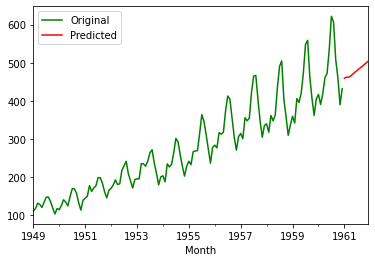

In [43]:
ind_air['Passengers'].plot(legend = True , label = "Original" , color ="green") # original
pred_air['Predicted'].plot(legend = True , label = "Predicted" , color ="red") # predicted

####  We can't find errors, Because Forecast is for Future Values and we do not have the actual Values for the future

# Using Train & Test

In [44]:
air=pd.read_csv(r'E:\Imarticus\11.TIME-SERIES\AirPassengers.csv')
air.Month=pd.to_datetime(air.Month,infer_datetime_format=True)
ind_air=air.set_index(['Month'])

In [45]:
train=ind_air.iloc[:-12]
test=ind_air.iloc[-12:]

In [46]:
train.shape

(132, 1)

In [47]:
test.shape

(12, 1)

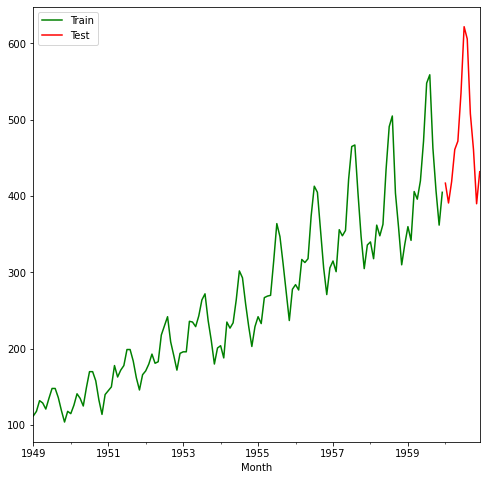

In [48]:
plt.figure(figsize =(8 , 8))
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
test['Passengers'].plot(legend = True , label = "Test" , color ="red")

In [49]:
train_log=np.log(train)

In [50]:
model=ARIMA(train_log,order=(3,1,2))
result_train=model.fit()

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [51]:
forecast_values_train=result_train.forecast(steps=12)
forecast_values_train[0]

array([6.13155933, 6.18930357, 6.22252873, 6.221375  , 6.22578232,
       6.22454017, 6.23427405, 6.24172512, 6.25466872, 6.2643962 ,
       6.27644899, 6.28604014])

In [52]:
forecast_values_train_df=pd.DataFrame(forecast_values_train[0])
forecast_values_train_df

,0
0,6.131559
1,6.189304
2,6.222529
3,6.221375
4,6.225782
5,6.224540
6,6.234274
7,6.241725
8,6.254669
9,6.264396


In [53]:
forecast_values_train_df=np.exp(forecast_values_train_df)
forecast_values_train_df

,0
0,460.153131
1,487.506472
2,503.976039
3,503.394925
4,505.618441
5,504.990782
6,509.930302
7,513.744015
8,520.436937
9,525.524176


In [54]:
date_for_pred1 = ['1960-01-01' , '1960-02-01' ,
'1960-03-01', '1960-04-01','1960-05-01',
'1960-06-01', '1960-07-01','1960-08-01',
'1960-09-01', '1960-10-01','1960-11-01',
'1960-12-01']

In [55]:
forecasted_values_train=pd.concat([pd.Series(date_for_pred1),forecast_values_train_df],axis=1)

In [56]:
l1 = [ 'Month' , 'Passengers']

In [57]:
forecasted_values_train.columns = l1

In [58]:
forecasted_values_train

,Month,Passengers
0,1960-01-01,460.153131
1,1960-02-01,487.506472
2,1960-03-01,503.976039
3,1960-04-01,503.394925
4,1960-05-01,505.618441
5,1960-06-01,504.990782
6,1960-07-01,509.930302
7,1960-08-01,513.744015
8,1960-09-01,520.436937
9,1960-10-01,525.524176


In [59]:
forecasted_values_train.Month = pd.to_datetime(forecasted_values_train.Month, infer_datetime_format= True )


forecasted_values_train = forecasted_values_train.set_index(['Month'])

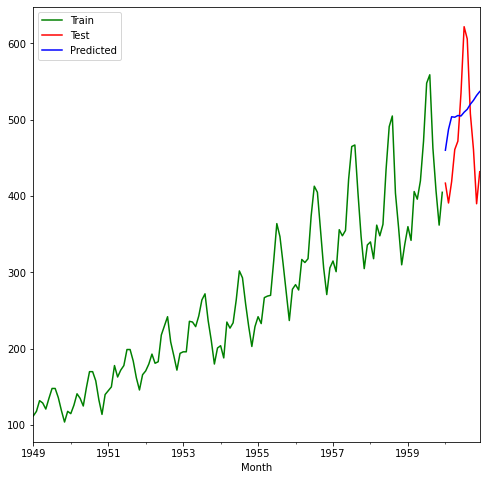

In [60]:
plt.figure(figsize =(8 , 8))
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
test['Passengers'].plot(legend = True , label = "Test" , color ="red")
forecasted_values_train['Passengers'].plot(legend = True , label = "Predicted" , color ="blue")

##### We can see that the predicted values are not in line.(Does not follow the pattern of actual)

In [61]:
error=test['Passengers']-forecasted_values_train['Passengers']

In [62]:
MSE=np.mean(np.square(error))
MSE

6564.825017659907

# Let's Forecast for 24 Months(1960 & 1961)

In [63]:
model=ARIMA(train_log,order=(3,1,2))
result_train=model.fit()

forecast_values_train=result_train.forecast(steps=24)
forecast_values_train[0]

forecast_values_train_df=pd.DataFrame(forecast_values_train[0])
forecast_values_train_df

forecast_values_train_df=pd.DataFrame(forecast_values_train[0])
forecast_values_train_df

forecast_values_train_df=np.exp(forecast_values_train_df)
forecast_values_train_df

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,0
0,460.153131
1,487.506472
2,503.976039
3,503.394925
4,505.618441
5,504.990782
6,509.930302
7,513.744015
8,520.436937
9,525.524176


In [64]:
date_for_pred1 = ['1960-01-01' , '1960-02-01' ,
'1960-03-01', '1960-04-01','1960-05-01',
'1960-06-01', '1960-07-01','1960-08-01',
'1960-09-01', '1960-10-01','1960-11-01',
'1960-12-01','1961-01-01' , '1961-02-01' ,
'1961-03-01', '1961-04-01','1961-05-01',
'1961-06-01', '1961-07-01','1961-08-01',
'1961-09-01', '1961-10-01','1961-11-01',
'1961-12-01']

In [65]:
forecasted_values_train=pd.concat([pd.Series(date_for_pred1),forecast_values_train_df],axis=1)

l1 = [ 'Month' , 'Passengers']
forecasted_values_train.columns = l1
forecasted_values_train

,Month,Passengers
0,1960-01-01,460.153131
1,1960-02-01,487.506472
2,1960-03-01,503.976039
3,1960-04-01,503.394925
4,1960-05-01,505.618441
5,1960-06-01,504.990782
6,1960-07-01,509.930302
7,1960-08-01,513.744015
8,1960-09-01,520.436937
9,1960-10-01,525.524176


In [66]:
forecasted_values_train.Month = pd.to_datetime(forecasted_values_train.Month, infer_datetime_format= True )


forecasted_values_train = forecasted_values_train.set_index(['Month'])

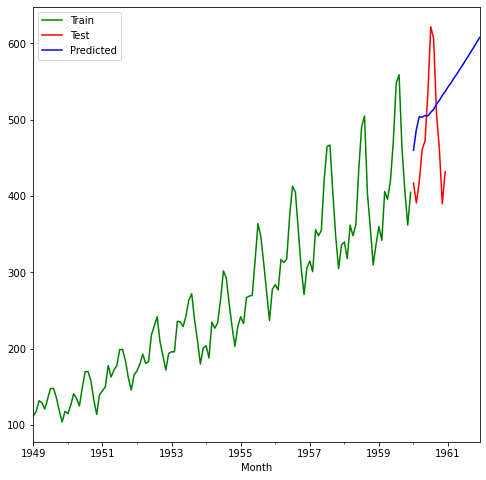

In [67]:
plt.figure(figsize =(8 , 8))
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
test['Passengers'].plot(legend = True , label = "Test" , color ="red")
forecasted_values_train['Passengers'].plot(legend = True , label = "Predicted" , color ="blue")

# SARIMA with Auto ARIMA

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose


In [69]:
! pip install pmdarima

In [70]:
import numpy as np

In [71]:
import pmdarima

In [72]:
from pmdarima import auto_arima

In [73]:
air=pd.read_csv(r'E:\Imarticus\11.TIME-SERIES\AirPassengers.csv')
air.Month=pd.to_datetime(air.Month,infer_datetime_format=True)
ind_air=air.set_index(['Month'])
ind_air_log=np.log(ind_air)

In [74]:
result=seasonal_decompose(ind_air_log)

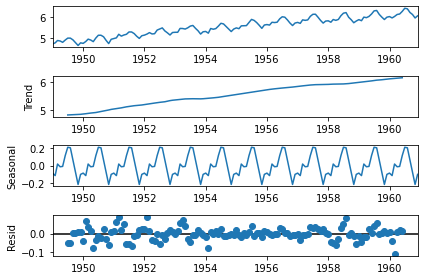

In [75]:
result.plot();


In [76]:
auto_arima(ind_air_log,seasonal=True,m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [77]:
model_sarima=SARIMAX(ind_air_log,order=(2,0,0),seasonal_order=(0,1,1,12))
result=model_sarima.fit()

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [78]:
result.predict()

1949-01-01    0.000000e+00
1949-02-01    7.790343e-08
1949-03-01    1.551301e-07
1949-04-01    2.315578e-07
1949-05-01    3.052816e-07
                  ...     
1960-08-01    6.436382e+00
1960-09-01    6.238475e+00
1960-10-01    6.097057e+00
1960-11-01    5.991837e+00
1960-12-01    6.083828e+00
Freq: MS, Length: 144, dtype: float64

In [79]:
np.exp(result.predict()).head(24)

1949-01-01      1.000000
1949-02-01      1.000000
1949-03-01      1.000000
1949-04-01      1.000000
1949-05-01      1.000000
1949-06-01      1.000000
1949-07-01      1.000000
1949-08-01      1.000001
1949-09-01      1.000001
1949-10-01      1.000001
1949-11-01      1.000001
1949-12-01      1.000001
1950-01-01    112.000090
1950-02-01    120.975641
1950-03-01    138.837722
1950-04-01    137.494379
1950-05-01    127.284263
1950-06-01    139.867642
1950-07-01    159.330599
1950-08-01    167.117057
1950-09-01    155.626836
1950-10-01    137.132627
1950-11-01    117.413519
1950-12-01    129.596713
Freq: MS, dtype: float64

In [80]:
pred=np.exp(result.predict(start=132,end=144))
pred

1960-01-01    419.519237
1960-02-01    397.372446
1960-03-01    458.662285
1960-04-01    419.749216
1960-05-01    459.941192
1960-06-01    547.659727
1960-07-01    611.443539
1960-08-01    624.144321
1960-09-01    512.076890
1960-10-01    444.547574
1960-11-01    400.149037
1960-12-01    438.705238
1961-01-01    447.553373
Freq: MS, dtype: float64

In [81]:
import matplotlib.pyplot as plt

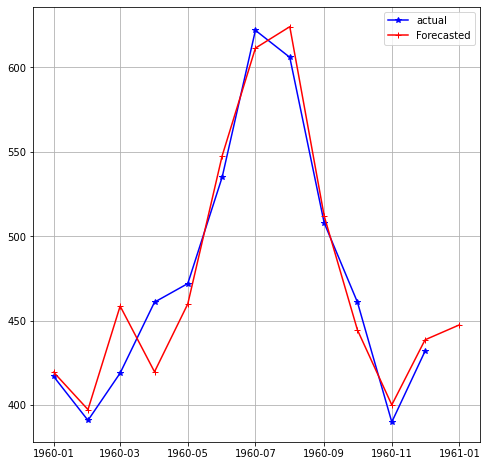

In [82]:

plt.figure(figsize =(8 , 8))
plt.plot(ind_air[132:144],marker='*',color='b',label='actual')
plt.plot(pred,                   color='r',label='Forecasted',marker="+")
plt.legend()
plt.grid()

In [83]:
error1= ind_air.Passengers[132:144]- pred

In [84]:
error1

1960-01-01    -2.519237
1960-02-01    -6.372446
1960-03-01   -39.662285
1960-04-01    41.250784
1960-05-01    12.058808
1960-06-01   -12.659727
1960-07-01    10.556461
1960-08-01   -18.144321
1960-09-01    -4.076890
1960-10-01    16.452426
1960-11-01   -10.149037
1960-12-01    -6.705238
1961-01-01          NaN
dtype: float64

In [85]:
error1.describe()

count    12.000000
mean     -1.664225
std      20.158572
min     -39.662285
25%     -10.776710
50%      -5.224668
75%      10.932047
max      41.250784
dtype: float64

In [86]:
np.mean(error1)

-1.6642251967406452

In [87]:
MSE=np.mean(np.square(error1))
print('MSE:\n',MSE)

MSE:
 375.2736661470379


In [88]:
RMSE=np.sqrt(MSE)
print('RMSE:\n',RMSE)

RMSE:
 19.37198147188454


# Let's Predict For Future values (1961)

In [89]:
pred_future=np.exp(result.predict(start=144,end=155))

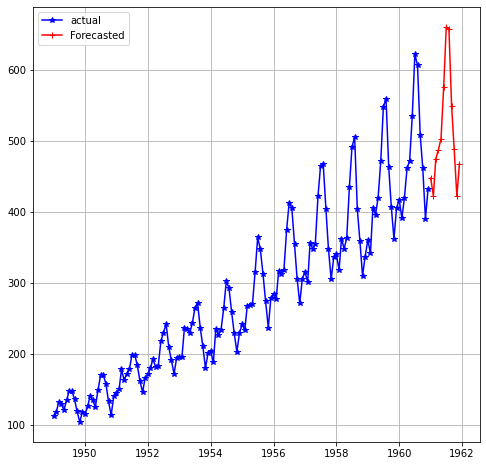

In [90]:
plt.figure(figsize =(8 , 8))
plt.plot(ind_air[0:144],marker='*',color='b',label='actual')
plt.plot(pred_future,                   color='r',label='Forecasted',marker="+")
plt.legend()
plt.grid()

# Above Graph shows that, We are Forecasting Correctly.